# Simulation of Heat Controller use case with CoFMPy

In [1]:
%reload_ext autoreload
%autoreload 2

from cofmpy.coordinator import Coordinator

In [2]:
coordinator = Coordinator()

fsolve_kwargs = {
    "solver": "fsolve",
    "time_step": 0.1,
}

coordinator.start(
    conf_path="config_gauss_seidel.json",
    fixed_point_init=False,
    fixed_point_kwargs=fsolve_kwargs,
)

INFO:cofmpy.config_parser:Success: found ./Heater.fmu
INFO:cofmpy.config_parser:Success: found ./HeatController.fmu
INFO:cofmpy.config_parser:Success: found ./Programmer.fmu


Skipping Fixed Point Initialization


In [3]:
print("Initial input dict:")
coordinator.master._input_dict

Initial input dict:


{'heater': {'P_in': [0]},
 'controller': {'Tc': [0], 'T_in': [0]},
 'programmer': {}}

In [4]:
coordinator.graph_engine.plot_graph()

## Run co-simulation

We run the use case as follows:

- 300 steps with setpoint Tc = 24 (temperature at t=0 is 17°C)
- 300 steps with setpoint Tc = 22
- 300 steps with setpoint Tc = 26

The time step is set to 0.1.

In [5]:
from tqdm import tqdm

communication_time_step = 1

N = 1440  # Run N steps
for _ in tqdm(range(N)):
    coordinator.do_step(communication_time_step)

results = coordinator.master.get_results()
for key, value in results.items():
    print(key)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:00<00:00, 22434.18it/s]

('programmer', 'T_out')
('heater', 'T_out')
('controller', 'P_out')
time


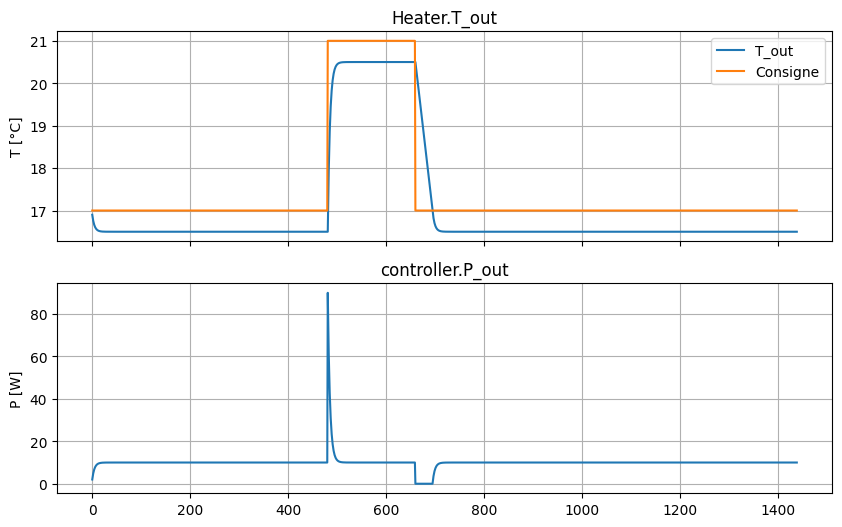

In [6]:
# Plot the results
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(results['time'], results[("heater", "T_out")])
axs[0].plot(results['time'], results[("programmer", "T_out")])
axs[0].set_ylabel("T [°C]")
axs[0].set_title("Heater.T_out")
axs[0].legend(["T_out", "Consigne"]);
axs[0].grid()

axs[1].plot(results['time'], results[("controller", "P_out")])
axs[1].set_ylabel("P [W]")
axs[1].set_title("controller.P_out")
axs[1].grid()

In [7]:
coordinator = Coordinator()

fsolve_kwargs = {
    "solver": "fsolve",
    "time_step": 0.1,
}

coordinator.start(
    conf_path="config_gauss_seidel_iterative.json",
    fixed_point_init=False,
    fixed_point_kwargs=fsolve_kwargs,
)

INFO:cofmpy.config_parser:Success: found ./Heater.fmu
INFO:cofmpy.config_parser:Success: found ./HeatController.fmu
INFO:cofmpy.config_parser:Success: found ./Programmer.fmu


Skipping Fixed Point Initialization


In [8]:
from tqdm import tqdm

communication_time_step = 1

N = 1440  # Run N steps
for _ in tqdm(range(N)):
    coordinator.do_step(communication_time_step)

results_iterative = coordinator.master.get_results()
for key, value in results.items():
    print(key)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:00<00:00, 12042.79it/s]

('programmer', 'T_out')
('heater', 'T_out')
('controller', 'P_out')
time


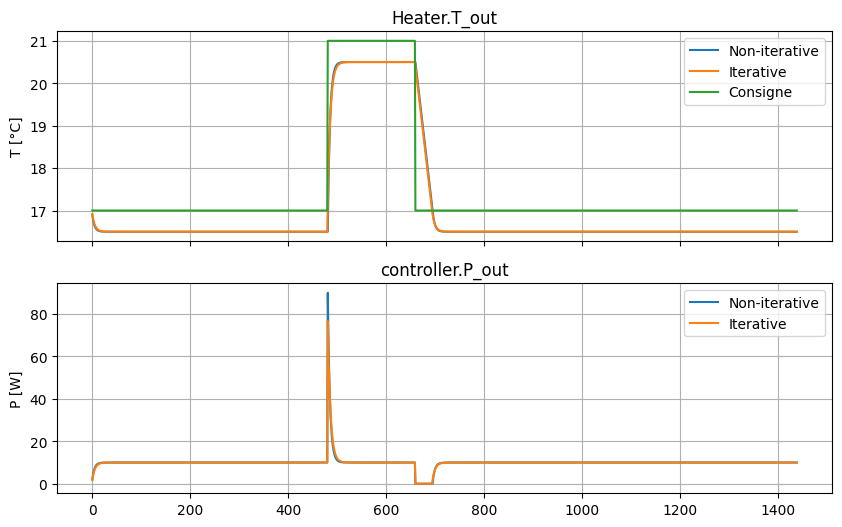

In [12]:
# Plot the results
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(results_iterative['time'], results[("heater", "T_out")])
axs[0].plot(results_iterative['time'], results_iterative[("heater", "T_out")])
axs[0].plot(results_iterative['time'], results[("programmer", "T_out")])
axs[0].set_ylabel("T [°C]")
axs[0].set_title("Heater.T_out")
axs[0].legend(["Non-iterative", "Iterative", "Consigne"]);
axs[0].grid()

axs[1].plot(results_iterative['time'], results[("controller", "P_out")])
axs[1].plot(results_iterative['time'], results_iterative[("controller", "P_out")])
axs[1].set_ylabel("P [W]")
axs[1].set_title("controller.P_out")
axs[1].legend(["Non-iterative", "Iterative"]);
axs[1].grid()

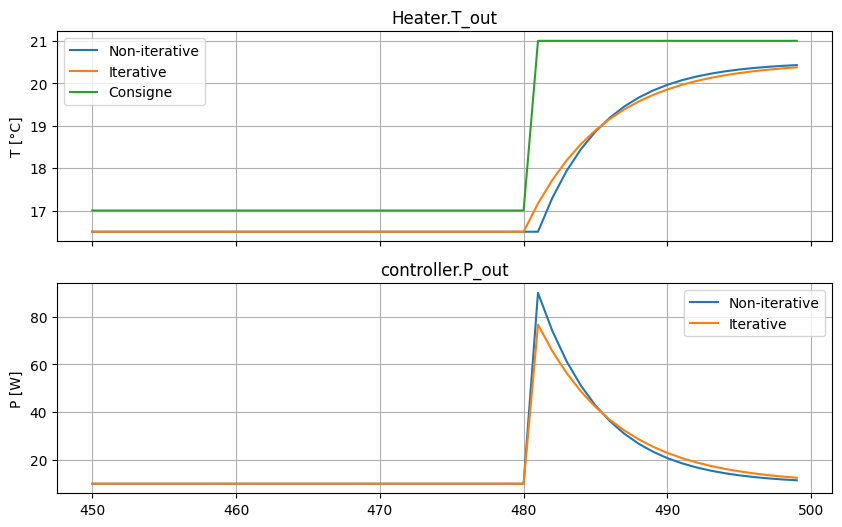

In [16]:
# Plot the results
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

min = 450
max = 500
axs[0].plot(results_iterative['time'][min:max], results[("heater", "T_out")][min:max])
axs[0].plot(results_iterative['time'][min:max], results_iterative[("heater", "T_out")][min:max])
axs[0].plot(results_iterative['time'][min:max], results[("programmer", "T_out")][min:max])
axs[0].set_ylabel("T [°C]")
axs[0].set_title("Heater.T_out")
axs[0].legend(["Non-iterative", "Iterative", "Consigne"]);
axs[0].grid()

axs[1].plot(results_iterative['time'][min:max], results[("controller", "P_out")][min:max])
axs[1].plot(results_iterative['time'][min:max], results_iterative[("controller", "P_out")][min:max])
axs[1].set_ylabel("P [W]")
axs[1].set_title("controller.P_out")
axs[1].legend(["Non-iterative", "Iterative"]);
axs[1].grid()